In [1]:
!pip install tensorboard

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
import glob
import numpy as np
import librosa
import os
import random
from random import shuffle
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
import torch.nn.functional as F
import pickle
from torch.utils.tensorboard import SummaryWriter
import sys

from torch.utils.data import Dataset, DataLoader

In [15]:
TIMIT_path = "C:/Users/Othman/Downloads/data"

wav_files_male_train_timit = []
wav_files_female_train_timit = []

path = os.path.join(TIMIT_path, "TRAIN")
for DR in os.listdir(path):
    DR_dir = os.path.join(path, DR)
    for speaker_dir in os.listdir(DR_dir):
        if speaker_dir[0] == 'F':
            speaker_dir = os.path.join(DR_dir, speaker_dir)
            wav_files_female_train_timit.extend([x for x in glob.glob(os.path.join(speaker_dir, "*.wav")) if 'wav' in x])
        elif speaker_dir[0] == 'M' :
            speaker_dir = os.path.join(DR_dir, speaker_dir)
            wav_files_male_train_timit.extend([x for x in glob.glob(os.path.join(speaker_dir, "*.wav")) if 'wav' in x])

In [16]:
wav_files_male_test_timit = []
wav_files_female_test_timit = []

path = os.path.join("C:/Users/Othman/Downloads/data", "TEST")
for DR in os.listdir(path):
    DR_dir = os.path.join(path, DR)
    for speaker_dir in os.listdir(DR_dir):
        if speaker_dir[0] == 'F':
            speaker_dir = os.path.join(DR_dir, speaker_dir)
            wav_files_female_test_timit.extend([x for x in glob.glob(os.path.join(speaker_dir, "*.wav")) if 'wav' in x])
        elif speaker_dir[0] == 'M' :
            speaker_dir = os.path.join(DR_dir, speaker_dir)
            wav_files_male_test_timit.extend([x for x in glob.glob(os.path.join(speaker_dir, "*.wav")) if 'wav' in x])

In [18]:
wav_files_male_full_timit = wav_files_male_test_timit + wav_files_male_train_timit
wav_files_female_full_timit = wav_files_female_test_timit + wav_files_female_train_timit

In [20]:
print(len(wav_files_male_full_timit))
print(len(wav_files_female_full_timit))

4380
1920


In [22]:
LIBRI_path = "C:/Users/Othman/Downloads/LibriSpeech"

f = open(os.path.join(LIBRI_path, "SPEAKERS.txt"), "r")
lines = f.readlines()
Libri_speakers_dict = dict()
for l in lines:
    if not ';' in l:
        split_line = l.replace(' ', '').split('|')
        Libri_speakers_dict[split_line[0]] = split_line[1]
print(Libri_speakers_dict)

{'14': 'F', '16': 'F', '17': 'M', '19': 'F', '20': 'F', '22': 'F', '23': 'F', '25': 'M', '26': 'M', '27': 'M', '28': 'F', '29': 'M', '30': 'F', '31': 'M', '32': 'F', '36': 'M', '37': 'M', '38': 'M', '39': 'F', '40': 'F', '44': 'F', '45': 'F', '46': 'M', '47': 'F', '49': 'M', '51': 'M', '52': 'F', '54': 'F', '55': 'M', '56': 'F', '57': 'F', '58': 'M', '60': 'M', '61': 'M', '62': 'M', '64': 'F', '65': 'F', '66': 'M', '70': 'M', '75': 'M', '77': 'F', '78': 'M', '79': 'F', '81': 'M', '82': 'F', '83': 'F', '84': 'F', '85': 'M', '87': 'F', '89': 'F', '90': 'M', '91': 'M', '92': 'F', '93': 'F', '94': 'M', '98': 'F', '100': 'F', '101': 'M', '102': 'F', '103': 'F', '104': 'F', '107': 'M', '110': 'F', '111': 'F', '112': 'F', '114': 'F', '115': 'F', '116': 'M', '118': 'M', '119': 'M', '121': 'F', '122': 'M', '123': 'F', '125': 'F', '126': 'F', '127': 'M', '128': 'M', '133': 'M', '147': 'M', '149': 'M', '150': 'F', '151': 'F', '152': 'M', '153': 'M', '154': 'M', '157': 'M', '159': 'M', '161': 'M',

In [24]:
wav_files_male_libri = []
wav_files_female_libri = []

path = os.path.join(LIBRI_path, "train-clean-100")
for speaker_dir in os.listdir(path):
    speaker_files = []
    speaker_dir = os.path.join(path, speaker_dir)
    for book_dir in os.listdir(speaker_dir):
        book_dir = os.path.join(speaker_dir, book_dir)
        speaker_files += glob.glob(os.path.join(book_dir, "*.flac"))
    speaker_subset = random.sample(speaker_files, 10)
    speaker_id = os.path.basename(speaker_subset[0]).split('-')[0]
    if Libri_speakers_dict[speaker_id] == 'F':
        wav_files_female_libri += speaker_subset
    elif Libri_speakers_dict[speaker_id] == 'M':
        wav_files_male_libri += speaker_subset        

In [27]:
wav_files_male_full = wav_files_male_full_timit + wav_files_male_libri
wav_files_female_full = wav_files_female_full_timit + wav_files_female_libri

In [28]:
len(wav_files_female_full + wav_files_male_full)

8810

In [35]:
wav_files_full = []
for w in wav_files_female_full:
    wav_files_full.append((w, 1))
    
for w in wav_files_male_full:
    wav_files_full.append((w, 0))
    
random.shuffle(wav_files_full)

In [38]:
no_male = 0
no_female = 0
for w in wav_files_full:
    if w[1] == 0: no_male += 1
    elif w[1] == 1: no_female += 1

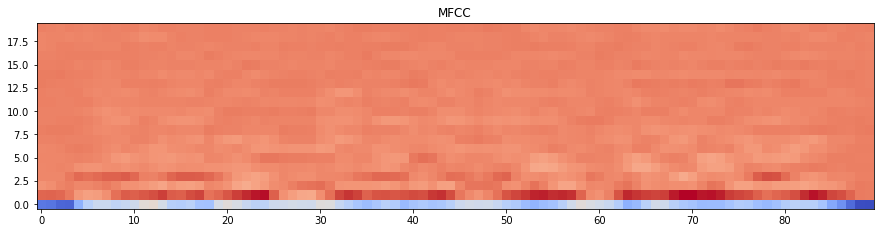

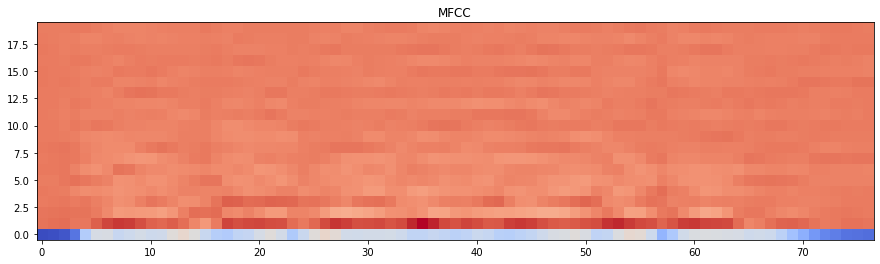

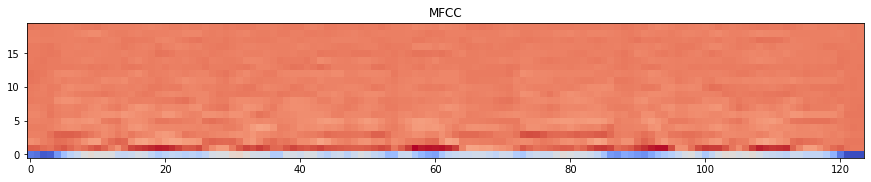

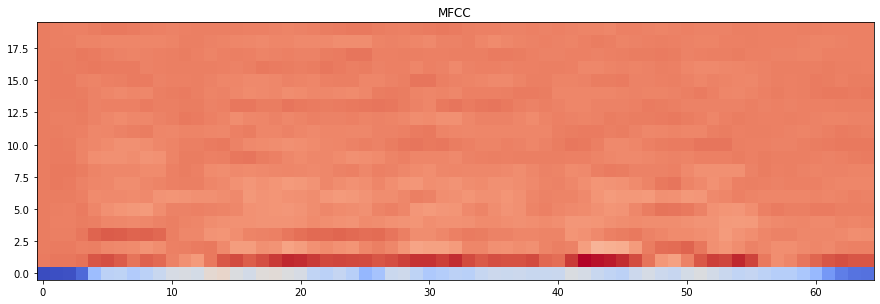

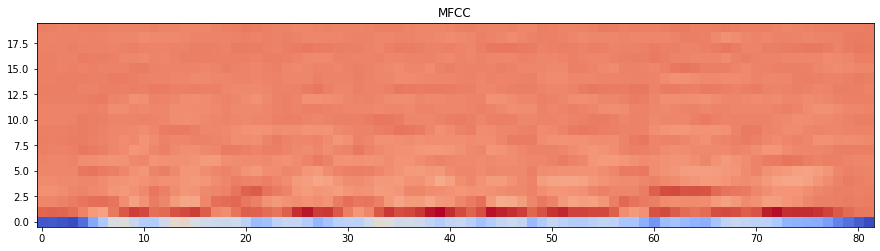

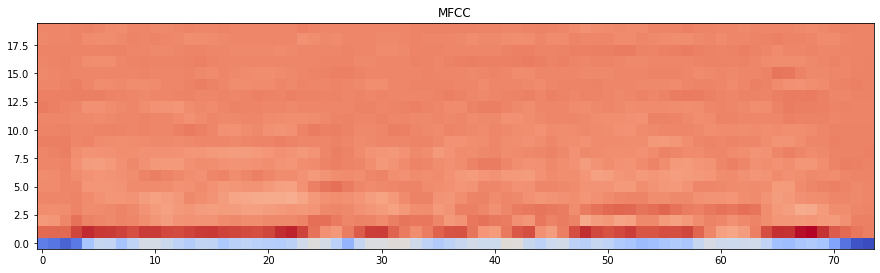

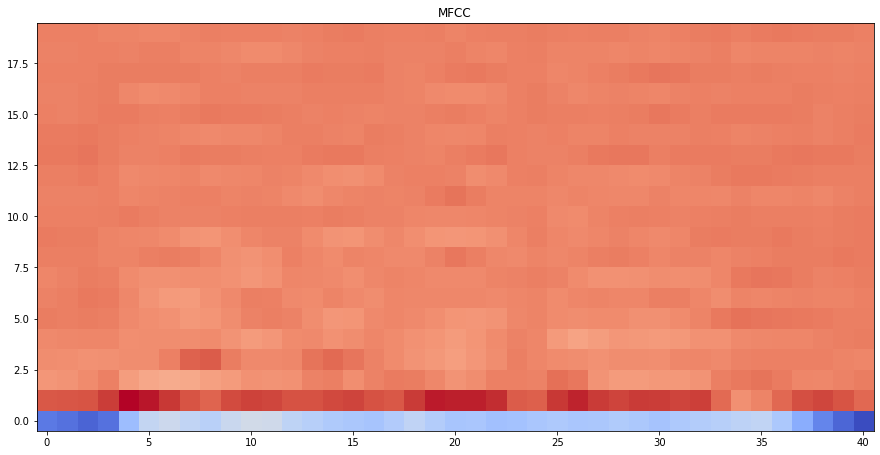

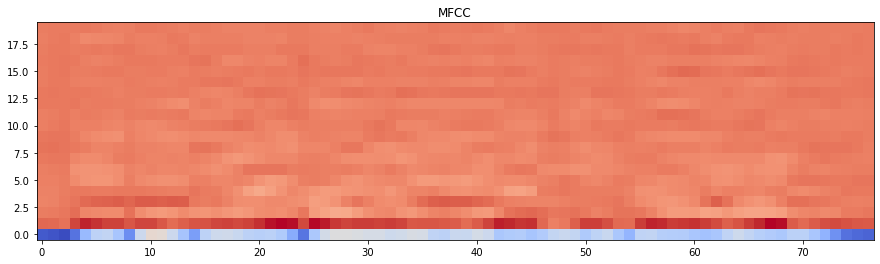

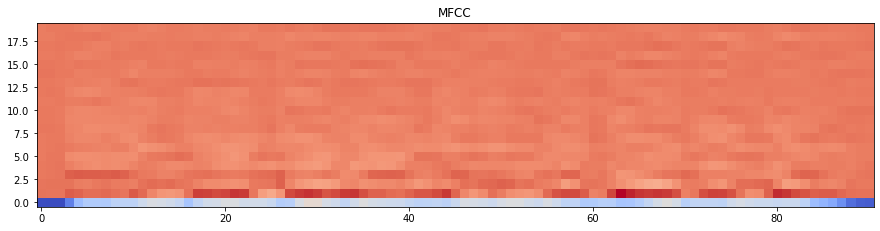

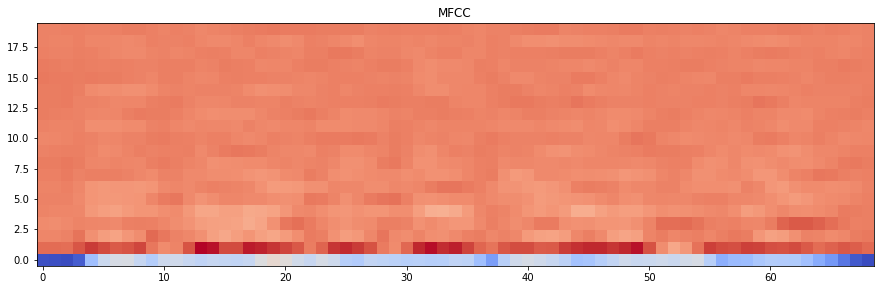

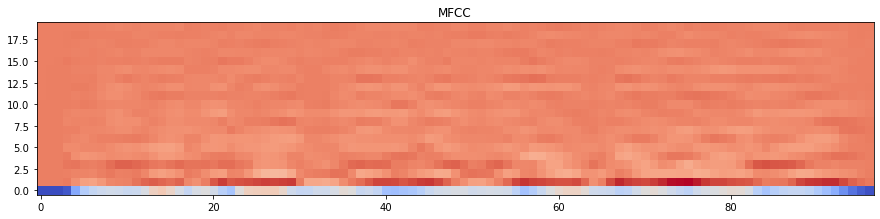

In [29]:
for i, w in enumerate(wav_files_male_full):
    sound_file, _ = librosa.core.load(w, sr=16000)
    mfccs = librosa.feature.mfcc(y=sound_file, sr=16000, n_mfcc=20)    
    
    fig, ax = plt.subplots(figsize=(15,15))
    cax = ax.imshow(mfccs, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
    ax.set_title('MFCC')
    
    if i==10: break

In [41]:
max_len = 0
max_duration = 0

In [3]:
mfccs_path = "C:/Users/Othman/Downloads/mfccs"


In [65]:
if not os.path.isdir(mfccs_path): os.mkdir(mfccs_path)
labels_dict = dict()

for i, w in enumerate(wav_files_full):
    sound_file, _ = librosa.core.load(w[0], sr=16000)
    mfccs = librosa.feature.mfcc(y=sound_file, sr=16000, n_mfcc=20)
    if mfccs.shape[1] > max_len: max_len = mfccs.shape[1]
    if len(sound_file)/16000 > max_duration: max_duration = len(sound_file)/16000 
            
    spk_id = os.path.basename(os.path.abspath(os.path.join(w[0], os.pardir)))
    np_name = spk_id + "_" + os.path.basename(w[0][:w[0].find('.')]) + "_mfcc.npy" 
    np_name = os.path.join(mfccs_path, np_name)
    labels_dict[np_name] = w[1]
    np.save(np_name, mfccs)

lbls_file_path = os.path.join(mfccs_path, "lbls.pkl")
lbls_file = open(lbls_file_path, "wb")
pickle.dump(labels_dict, lbls_file)
lbls_file.close()

In [67]:
max_duration

17.425

In [4]:
mfccs_list = glob.glob(os.path.join(mfccs_path, "*.npy"))
random.shuffle(mfccs_list)
for i, m in enumerate(mfccs_list):
    print(m)
    if i == 20: break

C:/Users/Othman/Downloads/mfccs\FEME0_SX335_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MWJG0_SX44_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MKCH0_SI2008_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MCLK0_SX310_mfcc.npy
C:/Users/Othman/Downloads/mfccs\121124_125-121124-0053_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MDAC0_SX181_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MGLB0_SI1534_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MKLR0_SX339_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MTHC0_SX115_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MPRK0_SX17_mfcc.npy
C:/Users/Othman/Downloads/mfccs\FCAJ0_SA1_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MDWK0_SA1_mfcc.npy
C:/Users/Othman/Downloads/mfccs\130578_911-130578-0017_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MCTT0_SX28_mfcc.npy
C:/Users/Othman/Downloads/mfccs\FTMG0_SX272_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MABC0_SX331_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MBTH0_SX32_mfcc.npy
C:/Users/Othman/Downloads/mfccs\MJEB1_SA1_mfcc.npy
C:/Users/Othman/Downloads/mfccs\

In [5]:
train_list = mfccs_list[:int(len(mfccs_list)*0.8)]
test_list = mfccs_list[int(len(mfccs_list)*0.8):int(len(mfccs_list)*0.9)]
val_list = mfccs_list[int(len(mfccs_list)*0.9):]

In [8]:
len(train_list)

7048

In [11]:
max_mfcc_len = 250

class mfcc_ds(Dataset):

  def __init__(self, train_list, lbls_path):
    self.train_list = train_list
    with open(lbls_path, 'rb') as f:
        self.lbls_dict = pickle.load(f)
    hp_shuffle_ds = True
    if hp_shuffle_ds: 
        random.shuffle(train_list)
        
  def __len__(self):
    return len(self.train_list)

  def __getitem__(self, idx):
    mfcc = np.load(self.train_list[idx])
    label = self.lbls_dict[self.train_list[idx]]
    if mfcc.shape[1] < max_mfcc_len:
        mfcc = np.pad(mfcc, ((0,0),(0, max_mfcc_len - mfcc.shape[1])))
    else:
        mfcc = mfcc[:, :max_mfcc_len]
    return torch.Tensor(mfcc), torch.Tensor([label])

ds_train = mfcc_ds(train_list, "C:/Users/Othman/Downloads/mfccs/lbls.pkl")
train_loader = DataLoader(ds_train, batch_size=64, shuffle=True)
ds_test = mfcc_ds(test_list, "C:/Users/Othman/Downloads/mfccs/lbls.pkl")
test_loader = DataLoader(ds_test, batch_size=64, shuffle=True) 
ds_val = mfcc_ds(val_list, "C:/Users/Othman/Downloads/mfccs/lbls.pkl")
val_loader = DataLoader(ds_val, batch_size=64, shuffle=True) 

In [12]:
for d, l in train_loader:
    print(d.shape, l.shape)
    break

torch.Size([64, 20, 250]) torch.Size([64, 1])


In [13]:
writer = SummaryWriter("C:/Users/Othman/Downloads/runs")

In [15]:
class GenderClassifierNN(nn.Module):
    
    def __init__(self):
        super(GenderClassifierNN, self).__init__()    
        self.LSTM = nn.LSTM(20, 64, num_layers=2, batch_first=True)
        for name, param in self.LSTM.named_parameters():
            print(name)
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_normal_(param)
        self.Linear = nn.Linear(64, 1)
        
    def forward(self, x):
        x, _ = self.LSTM(x.float()) #(batch, frames, n_mels)
        #only use last frame
        x = self.Linear(x[:, -1, :].float())
        x = torch.sigmoid(x)
        return x

In [22]:
GenderClassifierNN_model = GenderClassifierNN()

weight_ih_l0
weight_hh_l0
bias_ih_l0
bias_hh_l0
weight_ih_l1
weight_hh_l1
bias_ih_l1
bias_hh_l1


In [23]:
example = iter(test_loader)
d,l = example.next()
writer.add_graph(GenderClassifierNN_model, torch.reshape(d, (d.shape[0], -1, 20)))
writer.close()

In [18]:
for d, l in train_loader:
    inp = torch.reshape(d, (d.shape[0], -1, 20))
    print(inp.shape)
    print(GenderClassifierNN_model(inp))
    break

torch.Size([64, 250, 20])
tensor([[0.5078],
        [0.5067],
        [0.5075],
        [0.5065],
        [0.5075],
        [0.5075],
        [0.4865],
        [0.5098],
        [0.5029],
        [0.5074],
        [0.5071],
        [0.5075],
        [0.5081],
        [0.5072],
        [0.5074],
        [0.5082],
        [0.5074],
        [0.5067],
        [0.5073],
        [0.5073],
        [0.5213],
        [0.5176],
        [0.5079],
        [0.5073],
        [0.5057],
        [0.5169],
        [0.5073],
        [0.5228],
        [0.5098],
        [0.5075],
        [0.5073],
        [0.5070],
        [0.5067],
        [0.5187],
        [0.5159],
        [0.5002],
        [0.5135],
        [0.4889],
        [0.5230],
        [0.4918],
        [0.5074],
        [0.5046],
        [0.5073],
        [0.5076],
        [0.5075],
        [0.4916],
        [0.5072],
        [0.5069],
        [0.5071],
        [0.5157],
        [0.5067],
        [0.5072],
        [0.5074],
        [0.5076],
  

In [24]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(GenderClassifierNN_model.parameters(), lr=0.001) 

train_loss = []
val_loss = []
n_total_steps = len(train_loader)
num_epochs = 100
running_correct = 0

e=0
while(e < num_epochs):
    
    GenderClassifierNN_model.train()
    for batch_id, (mfccs, lbls) in enumerate(train_loader):
        mfccs = torch.reshape(mfccs, (mfccs.shape[0], -1, 20))
        outputs = GenderClassifierNN_model(mfccs)
        predicted = torch.gt(outputs, 0.5)
        running_correct += (predicted == lbls).sum().item()
        
        loss = criterion(outputs, lbls)
        optimizer.zero_grad()
        train_loss.append(loss)
        loss.backward()
        optimizer.step()
        
        if batch_id%5 == 0:
            print (f'TRAINING Epoch [{e+1}/100], Step [{batch_id+1}/{n_total_steps}], Loss: {loss.item():.4f}, AVGLoss: {sum(train_loss)/ len(train_loss)}')
            writer.add_scalar('training loss', loss, e * n_total_steps + batch_id)
            writer.add_scalar('avg training loss', sum(train_loss)/ len(train_loss), e * n_total_steps + batch_id)
            running_accuracy = running_correct / 5 / predicted.size(0)
            writer.add_scalar('train accuracy', running_accuracy, e * n_total_steps + batch_id)
            running_correct = 0
            
    GenderClassifierNN_model.eval()
    for batch_id, (mfccs, lbls) in enumerate(val_loader):
        mfccs = torch.reshape(mfccs, (mfccs.shape[0], -1, 20))
        outputs = GenderClassifierNN_model(mfccs)
        predicted = torch.gt(outputs, 0.5)
        running_correct += (predicted == lbls).sum().item()
        loss = criterion(outputs, lbls)
        val_loss.append(loss)
    else:
        print (f'VALIDATION Epoch [{e+1}/100], AVGLoss: {sum(val_loss)/ len(val_loss)}')
        writer.add_scalar('avg val loss', sum(val_loss)/ len(val_loss), e)
        running_accuracy = running_correct / len(val_loader) / predicted.size(0)
        writer.add_scalar('val accuracy', running_accuracy, e)
        running_correct = 0
    e += 1

TRAINING Epoch [1/100], Step [1/111], Loss: 0.6755, AVGLoss: 0.6755305528640747
TRAINING Epoch [1/100], Step [6/111], Loss: 0.6693, AVGLoss: 0.6773908138275146
TRAINING Epoch [1/100], Step [11/111], Loss: 0.6723, AVGLoss: 0.6739713549613953
TRAINING Epoch [1/100], Step [16/111], Loss: 0.6534, AVGLoss: 0.6723241209983826
TRAINING Epoch [1/100], Step [21/111], Loss: 0.6327, AVGLoss: 0.667445719242096
TRAINING Epoch [1/100], Step [26/111], Loss: 0.6357, AVGLoss: 0.6629598140716553
TRAINING Epoch [1/100], Step [31/111], Loss: 0.5540, AVGLoss: 0.6589905023574829
TRAINING Epoch [1/100], Step [36/111], Loss: 0.6681, AVGLoss: 0.6570515036582947
TRAINING Epoch [1/100], Step [41/111], Loss: 0.5676, AVGLoss: 0.6454153656959534
TRAINING Epoch [1/100], Step [46/111], Loss: 0.5866, AVGLoss: 0.6388416290283203
TRAINING Epoch [1/100], Step [51/111], Loss: 0.6526, AVGLoss: 0.636255145072937
TRAINING Epoch [1/100], Step [56/111], Loss: 0.5832, AVGLoss: 0.6348960995674133
TRAINING Epoch [1/100], Step [61

TRAINING Epoch [5/100], Step [36/111], Loss: 0.6488, AVGLoss: 0.5267003774642944
TRAINING Epoch [5/100], Step [41/111], Loss: 0.4657, AVGLoss: 0.5268505215644836
TRAINING Epoch [5/100], Step [46/111], Loss: 0.5553, AVGLoss: 0.5269807577133179
TRAINING Epoch [5/100], Step [51/111], Loss: 0.5095, AVGLoss: 0.5269930362701416
TRAINING Epoch [5/100], Step [56/111], Loss: 0.6278, AVGLoss: 0.5274032950401306
TRAINING Epoch [5/100], Step [61/111], Loss: 0.6679, AVGLoss: 0.5275492668151855
TRAINING Epoch [5/100], Step [66/111], Loss: 0.5649, AVGLoss: 0.5277799367904663
TRAINING Epoch [5/100], Step [71/111], Loss: 0.5257, AVGLoss: 0.5279232263565063
TRAINING Epoch [5/100], Step [76/111], Loss: 0.5997, AVGLoss: 0.5283201932907104
TRAINING Epoch [5/100], Step [81/111], Loss: 0.5002, AVGLoss: 0.5283514261245728
TRAINING Epoch [5/100], Step [86/111], Loss: 0.4594, AVGLoss: 0.5283910036087036
TRAINING Epoch [5/100], Step [91/111], Loss: 0.5254, AVGLoss: 0.5285703539848328
TRAINING Epoch [5/100], Step

KeyboardInterrupt: 

In [30]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (mfccs, labels) in enumerate(test_loader):
        print(i)
        mfccs = torch.reshape(mfccs, (mfccs.shape[0], -1, 20))
        print(mfccs.shape)
        outputs = GenderClassifierNN_model(mfccs)
        predicted = torch.gt(outputs, 0.5)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    print(n_samples, n_correct, n_correct/n_samples)

0
torch.Size([64, 250, 20])
1
torch.Size([64, 250, 20])
2
torch.Size([64, 250, 20])
3
torch.Size([64, 250, 20])
4
torch.Size([64, 250, 20])
5
torch.Size([64, 250, 20])
6
torch.Size([64, 250, 20])
7
torch.Size([64, 250, 20])
8
torch.Size([64, 250, 20])
9
torch.Size([64, 250, 20])
10
torch.Size([64, 250, 20])
11
torch.Size([64, 250, 20])
12
torch.Size([64, 250, 20])
13
torch.Size([49, 250, 20])
881 590 0.6696935300794552


In [52]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 59 * 2, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.float()
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 59 * 2)           
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))               
        x = self.fc3(x)                       
        return torch.sigmoid(x)

In [53]:
convnet = ConvNet()

In [54]:
for d, l in train_loader:
    print(d.type)
    inp = torch.reshape(d, (d.shape[0], 1, -1, 20))
    print(inp.shape)
    print(convnet(inp).shape)
    
    break

<built-in method type of Tensor object at 0x0000024503048BD8>
torch.Size([64, 1, 250, 20])
torch.Size([64, 1])


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(convnet.parameters(), lr=0.001)

n_total_steps = len(train_loader)
for epoch in range(100):
    for i, (mfccs, lbls) in enumerate(train_loader):
        mfccs = torch.reshape(mfccs, (mfccs.shape[0], 1, -1, 20))
        outputs = convnet(mfccs)
        loss = criterion(outputs, lbls)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print (f'Epoch [{epoch+1}/100], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (mfccs, labels) in enumerate(test_loader):
        print(i)
        mfccs = torch.reshape(mfccs, (mfccs.shape[0], -1, 20))
        outputs = GenderClassifierNN_model(mfccs)
        predicted = torch.gt(outputs, 0.5)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    print(n_samples, n_correct, n_correct/n_samples)
        
#         for i in range(batch_size):
#             label = labels[i]
#             pred = predicted[i]
#             if (label == pred):
#                 n_class_correct[label] += 1
#             n_class_samples[label] += 1


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (mfccs, labels) in enumerate(test_loader):
        print(i)
        mfccs = torch.reshape(mfccs, (mfccs.shape[0], 1, -1, 20))
        outputs = convnet(mfccs)
        predicted = torch.gt(outputs, 0.5)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    print(n_samples, n_correct, n_correct/n_samples)



In [ ]:
max_duration